In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
import copy
import torch.optim as optim
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA

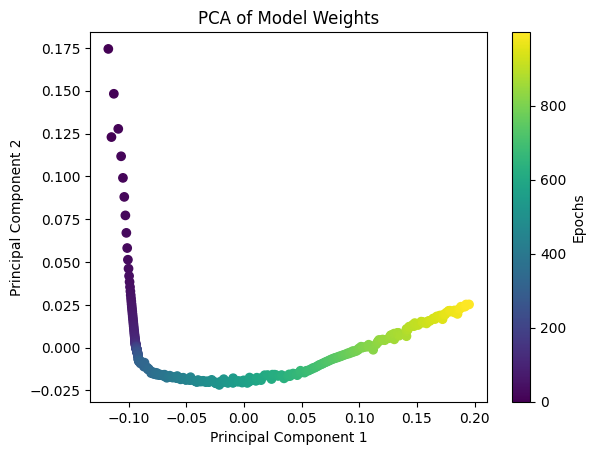

In [ ]:
def func(x):
    return np.sin(x)

# data points
x_data = np.linspace(0.1, 1, 1000)[:, np.newaxis]
y_data = func(x_data)

X, y = x_data, y_data

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# # Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

model2 = nn.Sequential(
    nn.Linear(1, 190),
    nn.ReLU(),
    nn.Linear(190, 1)
)

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

n_epochs = 1000
batch_size = 32
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse2, best_weights2 = np.inf, None
history2 = []

weights_list = []

for epoch in range(n_epochs):
    # Model 2
    model2.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model2(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer2.zero_grad()
            loss.backward()
            optimizer2.step()
            bar.set_postfix(mse=float(loss))

    if epoch % 3 == 0:
        # Collecting weights every 3 epochs
        weights_list.append(copy.deepcopy(model2.state_dict()))

    model2.eval()
    y_pred2 = model2(X_train)
    mse2 = float(loss_fn(y_pred2, y_train))
    history2.append(mse2)

    if mse2 < best_mse2:
        best_mse2 = mse2
        best_weights2 = copy.deepcopy(model2.state_dict())

# Reduce the dimension of weights to 2 using PCA
weights_array = np.array([list(w.values())[0].flatten().numpy() for w in weights_list])
pca = PCA(n_components=2)
weights_pca = pca.fit_transform(weights_array)

# Plot PCA plots
plt.scatter(weights_pca[:, 0], weights_pca[:, 1], c=np.arange(0, n_epochs, 3), cmap='viridis')
plt.colorbar(label='Epochs')
plt.title('PCA of Model Weights')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

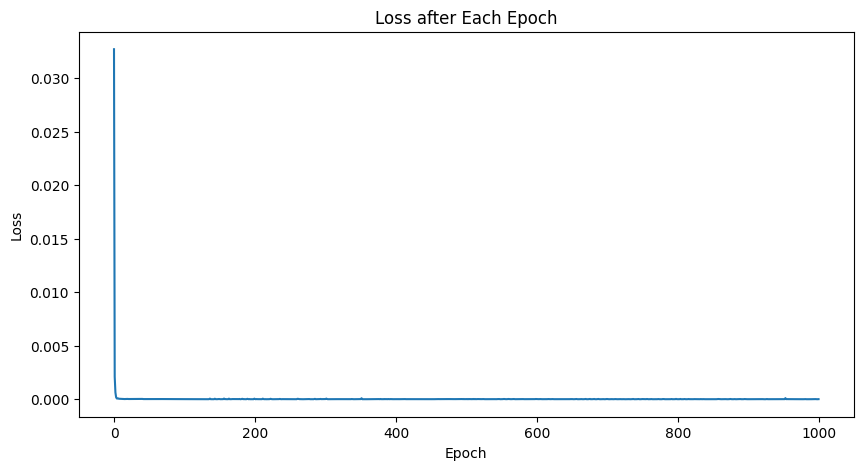

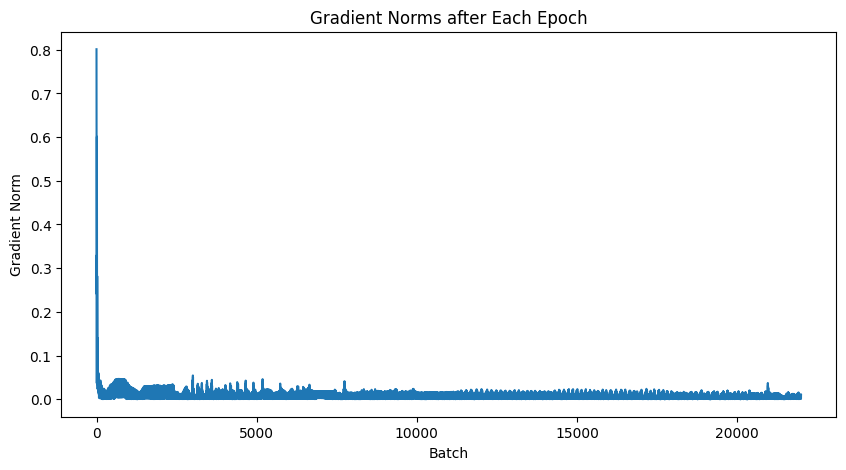

In [ ]:
def func(x):
    return np.sin(x)

# data points
x_data = np.linspace(0.1, 1, 1000)[:, np.newaxis]
y_data = func(x_data)

X, y = x_data, y_data

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# # Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

model2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 18),
    nn.ReLU(),
    nn.Linear(18, 15),
    nn.ReLU(),
    nn.Linear(15, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
)

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

n_epochs = 1000
batch_size = 32
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse2 = np.inf
best_weights2 = None
history2 = []
gradient_norms = []

for epoch in range(n_epochs):
    # Model 2
    model2.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            y_pred = model2(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer2.zero_grad()
            loss.backward()

            # Record gradient norms
            grad_norm = torch.nn.utils.clip_grad_norm_(model2.parameters(), max_norm=1)
            gradient_norms.append(grad_norm.item())

            optimizer2.step()
            bar.set_postfix(mse=float(loss), grad_norm=float(grad_norm))

    model2.eval()
    y_pred2 = model2(X_train)
    mse2 = float(loss_fn(y_pred2, y_train))
    history2.append(mse2)


# Plot loss after each epoch
plt.figure(figsize=(10, 5))
plt.plot(history2)
plt.title('Loss after Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot gradient norms after each epoch
plt.figure(figsize=(10, 5))
plt.plot(gradient_norms)
plt.title('Gradient Norms after Each Epoch')
plt.xlabel('Batch')
plt.ylabel('Gradient Norm')
plt.show()


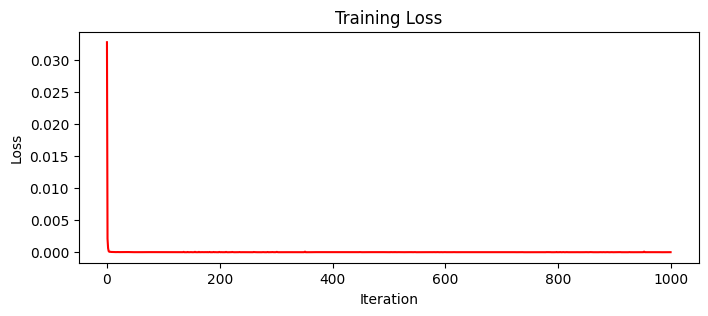

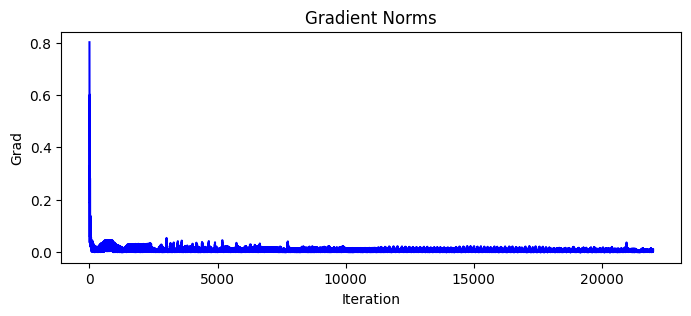

In [ ]:
# Plot loss
plt.figure(figsize=(8, 3))
plt.plot(history2,color = 'red')
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Plot gradient norms
plt.figure(figsize=(8, 3))
plt.plot(gradient_norms,color='blue')
plt.title('Gradient Norms')
plt.xlabel('Iteration')
plt.ylabel('Grad')
plt.show()

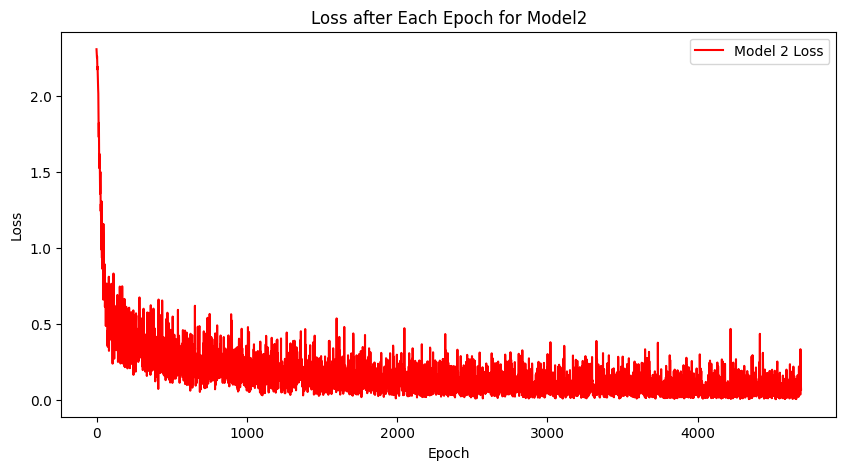

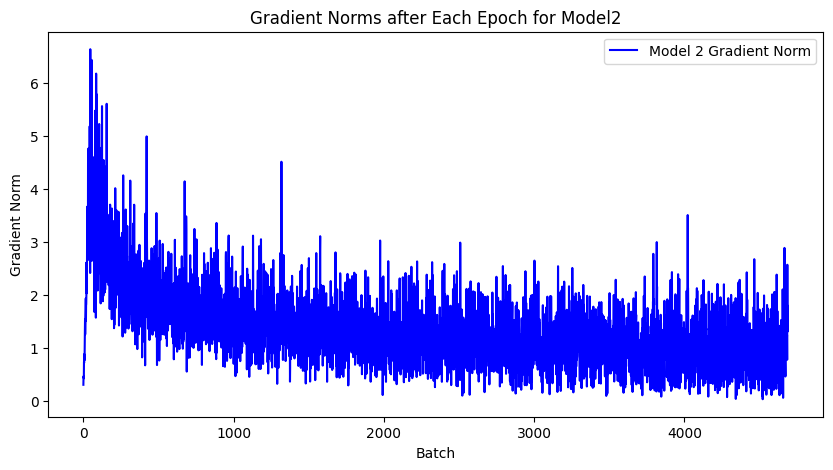

In [ ]:
# import torchvision.transforms as transforms
# # Define transformations for MNIST data
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])



# # Load MNIST test dataset
# test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
# test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4)

# # Define Model 2
# class Model2(nn.Module):
#     def __init__(self):
#         super(Model2, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 64)
#         self.fc4 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         return self.fc4(x)


# # Function to train a model and return the loss history
# def train_model(model, train_loader, optimizer, criterion, device):
#     model.train()
#     loss_history = []
#     for input_data, target in train_loader:
#         input_data, target = input_data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(input_data)
#         loss = criterion(output, target)
#         loss.backward()
#         optimizer.step()
#         loss_history.append(loss.item())
#     return loss_history

# # Instantiate the models
# model2 = Model2()


# # Choose the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Move models to the chosen device
# model2.to(device)


# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer2 = optim.Adam(model2.parameters(), lr=0.001)


# # Training loop
# epochs = 5
# loss_history1, loss_history2, loss_history3 = [], [], []
# for epoch in range(epochs):
#     # Training for Model 2
#     loss_history2 += train_model(model2, train_loader, optimizer2, criterion, device)


# # Define transformations for MNIST data
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# # Load MNIST train dataset
# train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
# train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4)

# # Load MNIST test dataset
# test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
# test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4)

# # Define Model 2
# class Model2(nn.Module):
#     def __init__(self):
#         super(Model2, self).__init__()
#         self.fc1 = nn.Linear(28 * 28, 256)
#         self.fc2 = nn.Linear(256, 128)
#         self.fc3 = nn.Linear(128, 64)
#         self.fc4 = nn.Linear(64, 10)

#     def forward(self, x):
#         x = x.view(-1, 28 * 28)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         return self.fc4(x)

# # Function to train a model and return the loss and gradient norm history
# def train_model(model, train_loader, optimizer, criterion, device):
#     model.train()
#     loss_history = []
#     grad_norm_history = []
#     for input_data, target in train_loader:
#         input_data, target = input_data.to(device), target.to(device)
#         optimizer.zero_grad()
#         output = model(input_data)
#         loss = criterion(output, target)
#         loss.backward()

#         # Record gradient norm
#         grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
#         grad_norm_history.append(grad_norm.item())

#         optimizer.step()
#         loss_history.append(loss.item())
#     return loss_history, grad_norm_history

# # Instantiate Model 2
# model2 = Model2()

# # Choose the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Move Model 2 to the chosen device
# model2.to(device)

# # Define the loss function and optimizer for Model 2
# criterion = nn.CrossEntropyLoss()
# optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

# # Training loop
# epochs = 5
# loss_history2, grad_norm_history2 = [], []
# for epoch in range(epochs):
#     # Training for Model 2
#     loss2, grad_norm2 = train_model(model2, train_loader, optimizer2, criterion, device)
#     loss_history2 += loss2
#     grad_norm_history2 += grad_norm2

# # Plot loss after each epoch
# plt.figure(figsize=(10, 5))
# plt.plot(loss_history2, label='Model 2')
# plt.title('Loss after Each Epoch for Model_MNIST')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot gradient norms after each epoch
# plt.figure(figsize=(10, 5))
# plt.plot(grad_norm_history2, label='Model_MNIST')
# plt.title('Gradient Norms after Each Epoch for Model 2')
# plt.xlabel('Batch')
# plt.ylabel('Gradient Norm')
# plt.legend()
# plt.show()

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations for MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST test dataset
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Define the Model2 class
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Load MNIST train dataset
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Instantiate Model2
model2 = Model2()

# Choose the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move Model2 to the chosen device
model2.to(device)

# Define the loss function and optimizer for Model2
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

# Training function with gradient norm tracking
def train_model(model, train_loader, optimizer, criterion, device):
    model.train()
    loss_history = []
    grad_norm_history = []
    for input_data, target in train_loader:
        input_data, target = input_data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(input_data)
        loss = criterion(output, target)
        loss.backward()

        # Record gradient norm
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        grad_norm_history.append(grad_norm.item())

        optimizer.step()
        loss_history.append(loss.item())
    return loss_history, grad_norm_history

# Training loop
epochs = 5
loss_history2, grad_norm_history2 = [], []
for epoch in range(epochs):
    # Training for Model2
    loss2, grad_norm2 = train_model(model2, train_loader, optimizer2, criterion, device)
    loss_history2 += loss2
    grad_norm_history2 += grad_norm2

# Plot loss after each epoch
plt.figure(figsize=(10, 5))
plt.plot(loss_history2, label='Model 2 Loss', color='red')
plt.title('Loss after Each Epoch for Model2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot gradient norms after each epoch
plt.figure(figsize=(10, 5))
plt.plot(grad_norm_history2, label='Model 2 Gradient Norm' ,color='blue')
plt.title('Gradient Norms after Each Epoch for Model2')
plt.xlabel('Batch')
plt.ylabel('Gradient Norm')
plt.legend()
plt.show()


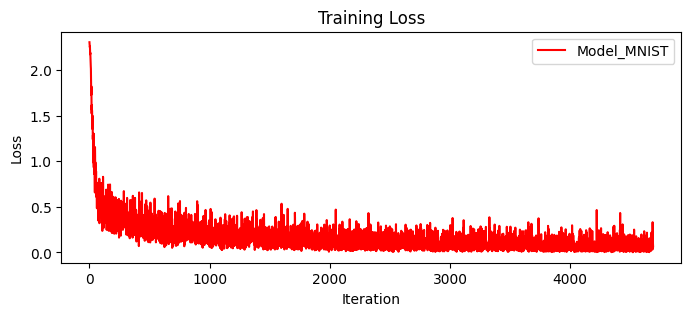

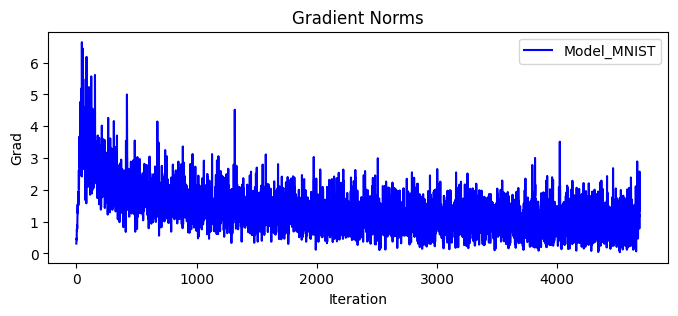

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(loss_history2, label='Model_MNIST', color='red')
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot gradient norms after each epoch
plt.figure(figsize=(8, 3))
plt.plot(grad_norm_history2, label='Model_MNIST', color='blue')
plt.title('Gradient Norms')
plt.xlabel('Iteration')
plt.ylabel('Grad')
plt.legend()
plt.show()


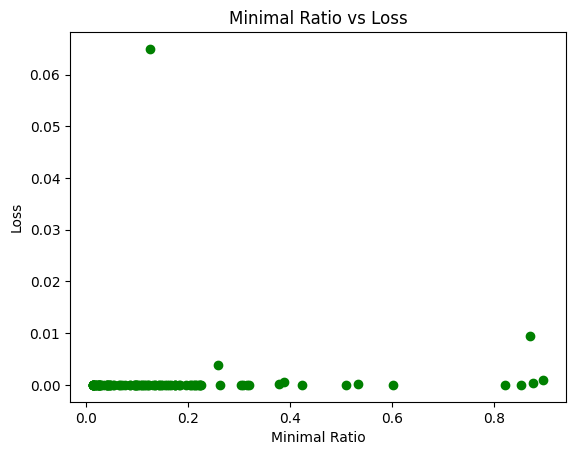

In [ ]:
def func(x):
    return np.sin(x)

# data points
x_data = np.linspace(0.1, 1, 1000)[:, np.newaxis]
y_data = func(x_data)

X, y = x_data, y_data

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

model2 = nn.Sequential(
    nn.Linear(1, 190),
    nn.ReLU(),
    nn.Linear(190, 1)
)

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

n_epochs = 100
batch_size = 32
batch_start = torch.arange(0, len(X_train), batch_size)

# Lists to hold the history of loss and gradient norms
loss_history, gradient_norm_history = [], []

# Hold the best model
best_mse = np.inf
best_weights = None

for epoch in range(n_epochs):
    model2.train()
    for start in batch_start:
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        y_pred = model2(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        # Record gradient norms
        grad_norm = torch.norm(torch.cat([p.grad.view(-1) for p in model2.parameters()]))
        gradient_norm_history.append(grad_norm.item())
        loss_history.append(loss.item())

    # At the end of each epoch, calculate minimal ratio and corresponding loss
    min_ratio = min(gradient_norm_history[-batch_size:]) / gradient_norm_history[-1]
    min_loss = loss_history[-1]

    # Plot only at the end of each epoch
    plt.scatter(min_ratio,min_loss, color='green')

plt.ylabel('Loss')
plt.xlabel('Minimal Ratio')
plt.title('Minimal Ratio vs Loss')
plt.show()